In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from yellowbrick.model_selection.importances import FeatureImportances
import scikitplot as skplt
import lightgbm as lgbm
import set_dataset as k
%matplotlib inline
import importlib
importlib.reload(k)

<module 'set_dataset' from '/Users/kelvin/GAMES/src/set_dataset.py'>

In [3]:
x,y = k.x_and_y(0.70)
print(x.shape)
print(y.shape)
print(f'Percentage of Majority Class: {round(y[y==0].count() / y.shape[0]*100, 2)}%')
print(f'Percentage of Minority Class: {round(y[y==1].count() / y.shape[0]*100, 2)}%')
y.value_counts()

(27075, 413)
(27075,)
Percentage of Majority Class: 86.43%
Percentage of Minority Class: 13.57%


0    23401
1     3674
dtype: int64

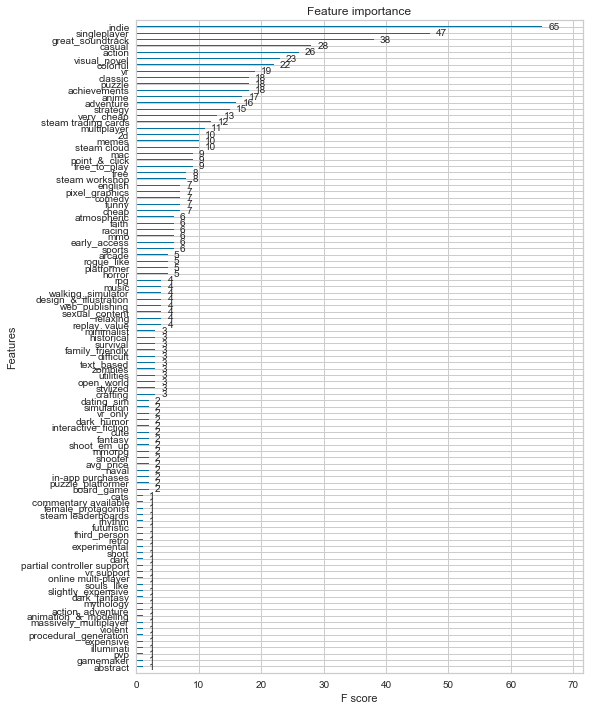

                            Gini-importance
singleplayer                       0.174973
indie                              0.056489
anime                              0.048773
steam cloud                        0.046843
multiplayer                        0.037792
very_cheap                         0.031199
steam trading cards                0.030121
action                             0.029498
great_soundtrack                   0.022688
adventure                          0.020946
vr                                 0.016924
free_to_play                       0.016856
casual                             0.016275
classic                            0.015703
memes                              0.015028
mac                                0.014921
funny                              0.014778
sexual_content                     0.013104
puzzle                             0.011977
cheap                              0.011969
strategy                           0.011251
horror                          

In [4]:
importlib.reload(k)
x_top, y, top = k.top_xgb_importance(x, y, RandomOverSampler(), 150)

Displaying top 245 variables                                feature      coef
18                              puzzle  0.025848
32                       point_&_click  0.023923
0                         singleplayer  0.023762
8                     great_soundtrack  0.023396
23                        visual_novel  0.020890
37                          rogue_like  0.019193
12                              casual  0.019119
13                             classic  0.018888
16                               funny  0.015279
25                      pixel_graphics  0.015151
38                             english  0.014799
33                          platformer  0.014376
66                                  2d  0.014344
5                           very_cheap  0.012586
22                              comedy  0.012240
44                               music  0.011827
2                                anime  0.011689
64                              arcade  0.010909
83                                cute  

,feature,coef
18,puzzle,0.025848
32,point_&_click,0.023923
0,singleplayer,0.023762
8,great_soundtrack,0.023396
23,visual_novel,0.020890
37,rogue_like,0.019193
13,classic,0.018888
16,funny,0.015279
25,pixel_graphics,0.015151
33,platformer,0.014376


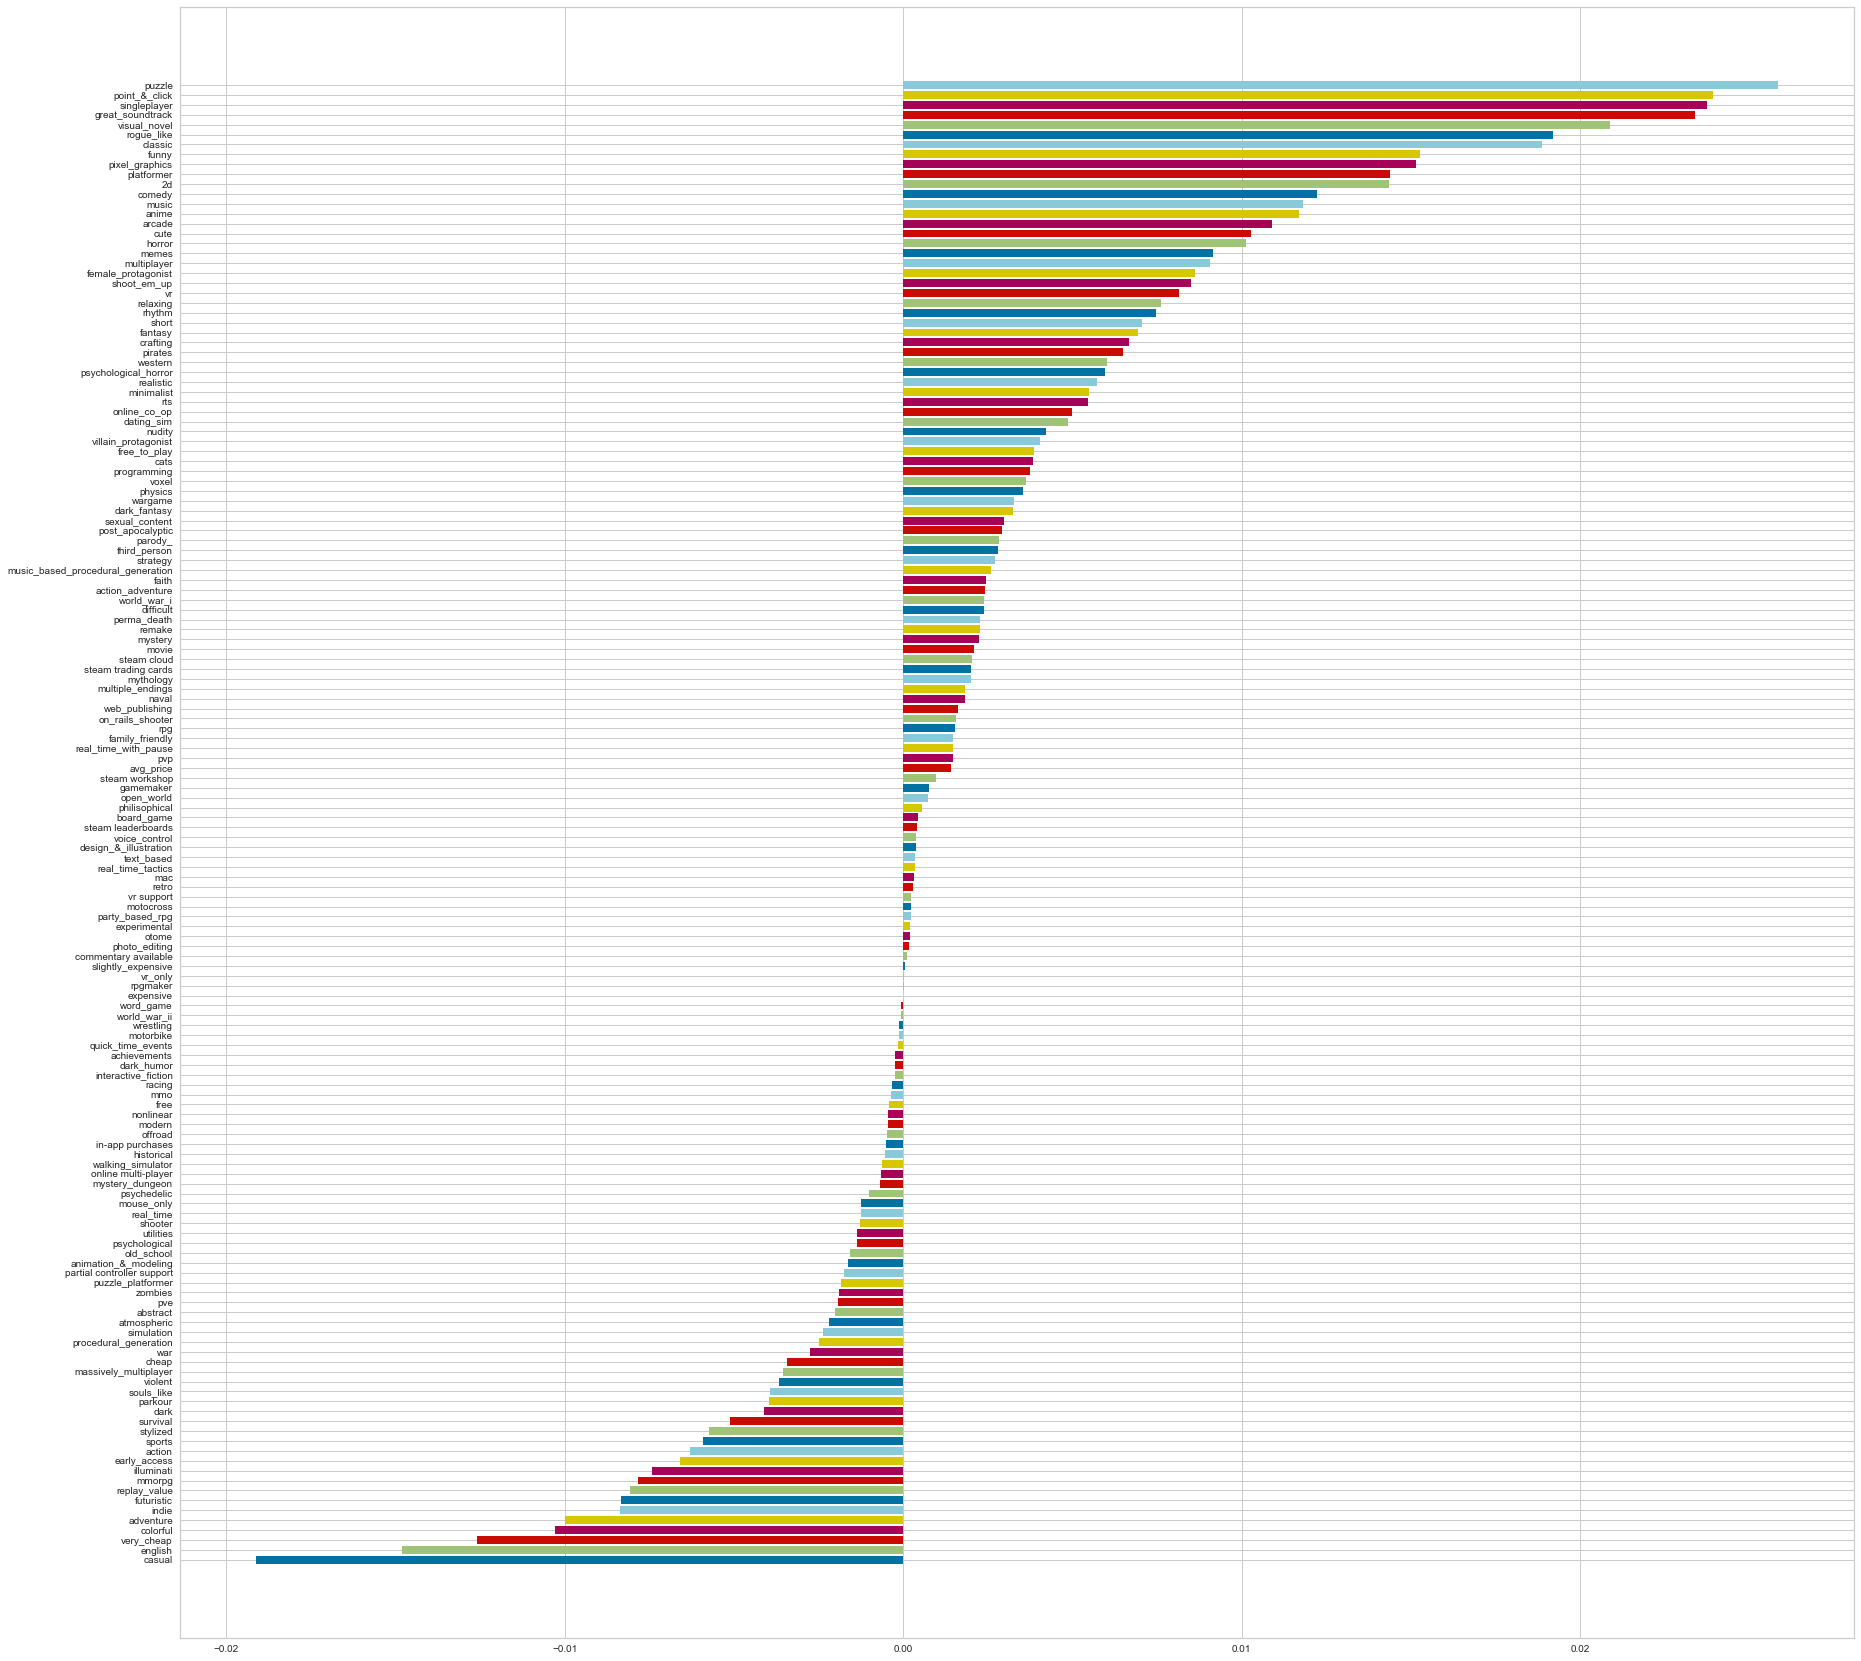

In [5]:
importlib.reload(k)
x_coef, y, coef = k.top_logreg_coef(x_top,y, RandomOverSampler(), 100)
coef = coef.sort_values(by='coef', ascending=False)
coef